<br><br><h1 style='font-size:3em; color:#2467C0'> 311 Complaints Analysis (HPD) </h1><center>

<table>
<col width = '550'>
<col width = '450'>
<tr>
<td><img src="https://www1.nyc.gov/assets/hpd/images/content/pages/what-to-expect-sm.png" /></td>
<td>
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The <b>Department of Housing Preservation and Development</b> of New York City is the agency that processes 311 complaints that are related to housing and buildings.<br>
<br>    
In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

</td>
</tr>
</table>

<h1 style='font-size:2em; color:#2467C0'> Problem Statement </h1>
The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:

<ol> 1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? </ol>

<ol> 2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?</ol>

<ol>3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?</ol>

<ol>4. Can a predictive model be built for a future prediction of the number of complaints of the type that you have identified in response to question 1?</ol>

<h2> Table of content </h2>

<div class='alert alert-block alert-info' style='margin-top: 20px'>
<ol>
    <li><a href='#Import Libraries'>Import Libraries</a>
    <li><a href='#About dataset'>About dataset</a>
    <li><a href='#Exploring Data'>Exploring Data</a>
    <li><a href='#Problem Statement 1'>Problem Statement 1</a>

</ol>
</div>
<hr>

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = [20,9]

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


### About dataset

This dataset will have complaints submitted between 2010 and 2020. It can be downloaded from <a href = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'> here </a>.

| Field          | Description                                                    |
|----------------|--------------------------------------------------------------  |
| created_date   |Date SR was created.                                            |
| unique_key     |Unique identifier of a Service Request (SR) in the open data set. |
| complaint_type |This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.|
| incident_zip     |Incident location zip code, provided by geo validation.|
| incident_address     | House number of incident address provided by submitter.|
| street_name     |Street name of incident address provided by the submitter.|
| city     |City of the incident location provided by geovalidation. |
| resolution_description     |Describes the last action taken on the SR by the responding agency. May describe next or future steps.|
| borough     |Provided by the submitter and confirmed by geovalidation. |
| latitude     |Geo based Lat of the incident location. |
| longitude     |Geo based Long of the incident location.|
| closed_date     |Date SR was closed by responding agency. |
| location_type     |Describes the type of location used in the address information.|
| status     |Status of SR submitted.|

#### Ingest Data

In [3]:
df= pd.read_csv(r'C:\Users\User\Downloads/fhrw-4uyv.csv')
#df = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status')

<h1 style='font-size:2em; color:#2467C0'> Exploring Data </h1>

In [4]:
df[:5]

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-10-04T18:32:26.000,47780109,FLOORING/STAIRS,11211.0,601 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.714123,-73.948835,2020-10-07T11:27:14.000,RESIDENTIAL BUILDING,Closed
1,2020-10-04T08:34:10.000,47780207,APPLIANCE,11229.0,2113 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.597410,-73.949756,2020-10-07T11:35:29.000,RESIDENTIAL BUILDING,Closed
2,2020-10-04T16:47:24.000,47780238,HEAT/HOT WATER,10469.0,2561 BRONXWOOD AVENUE,BRONXWOOD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.863994,-73.861626,2020-10-07T17:46:29.000,RESIDENTIAL BUILDING,Closed
3,2020-10-04T16:16:15.000,47780255,HEAT/HOT WATER,11212.0,465 EAST 91 STREET,EAST 91 STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.654741,-73.920791,2020-10-07T10:58:46.000,RESIDENTIAL BUILDING,Closed
4,2020-10-04T08:25:06.000,47780257,HEAT/HOT WATER,11229.0,2113 AVENUE V,AVENUE V,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.597410,-73.949756,2020-10-07T02:05:45.000,RESIDENTIAL BUILDING,Closed


In [5]:
df.shape

(6372943, 15)

In [6]:
df.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [7]:
df.isnull().sum(axis=0)

created_date                    0
unique_key                      0
complaint_type                  0
incident_zip                80768
incident_address            52831
street_name                 52831
address_type                84752
city                        80340
resolution_description       7816
borough                         0
latitude                  2830559
longitude                 2830559
closed_date                141649
location_type               52830
status                          0
dtype: int64

`created_date`, `complaint_type`, `borough` columns has no null value.

In [8]:
df.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

Some columns are not of the correct data type.<br>
Data type `created_date` maps to <M8[ns] for time series analysis. 

In [9]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['created_date'].dtypes

dtype('<M8[ns]')

Data type `unique_key`,`incident_zip` , `latitude`, `longitude` map to str as they are Nominal Data (Categorical Data).

In [10]:
df[['unique_key','latitude','longitude']] = df[['unique_key','latitude','longitude']].astype('str')
df['incident_zip'] = df['incident_zip'].replace(np.NaN, 0)
df['incident_zip'] = df['incident_zip'].astype('int')
df['incident_zip'] = df['incident_zip'].astype('str')

In [11]:
df.describe(include='all')

<ipython-input-11-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
count,6372943,6372943,6372943,6372943,6320112,6320112,6288191,6292603,6365127,6372943,6372943,6372943,6231294,6320113,6372943
unique,1922885,6372943,30,207,181738,6879,1,89,342,6,160243,159967,887594,5,5
top,2013-01-24 00:00:00,42087800,HEAT/HOT WATER,11226,34 ARDEN STREET,GRAND CONCOURSE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,nan,nan,2012-11-07T00:00:00.000,RESIDENTIAL BUILDING,Closed
freq,7581,1,1398243,227348,14480,97762,6288191,2132386,1800740,1845704,2830559,2830559,7296,6313004,6224365
first,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 23:58:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print('The data complaints logged since {} until {}.'.format(df['created_date'].min(), df['created_date'].max()))

The data complaints logged since 2010-01-01 00:00:00 until 2020-12-31 23:58:22.


In [13]:
df['status'].value_counts()

Closed         6224365
Open            148259
In Progress        312
Assigned             4
Pending              3
Name: status, dtype: int64

<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

A quick glance from the statistical summary gives a brief information about the dataset, there are *6,372,943* cases of complaint lodged by New York people from 2010-01-01 to 2020-12-31. `complaint_type` has 30 unique values. The most frequent appeared value in `complaint_type` is HEAT/HOT WATER, *1,398,243* times, contributed approximately 20% of the total complaint cases. Most complaint came from `borough` BROOKLYN, *1,845,704* times.  

<h1 style='font-size:2em; color:#2467C0'> Problem Statment 1 </h1>

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? <br>
<br>
This question can be answered by: <br>
1. comparing the total cases amount of each complaint type. <br>
2. comparing the trend of each complaint type in previous year <br>
    (eg. to confirm the most complaint type by total cases (1.) is the same as the most complaint type in year 2020.)

<h1 style='font-size:1.5em; color:#43C6DB'> 1.1 Top Complaints by Total Cases Amount </h1>

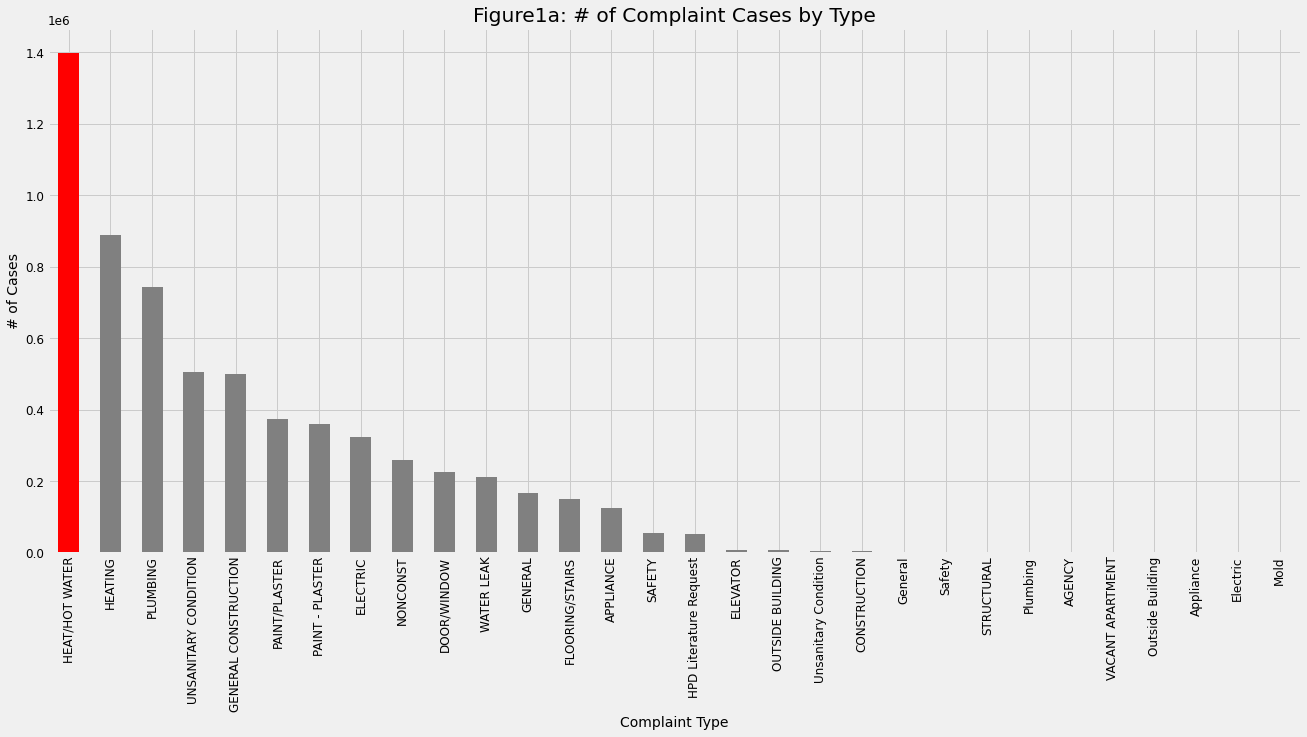

In [14]:
colors = ['grey' if (x < df['complaint_type'].value_counts().max()) else 'red' for x in df['complaint_type'].value_counts()]  
df['complaint_type'].value_counts().plot(kind='bar', color = colors)
plt.xlabel('Complaint Type')
plt.ylabel('# of Cases')
plt.title('Figure1a: # of Complaint Cases by Type')
plt.show()

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. In this case, an assumption can be made that the Top 7 complaint types will contribute 80% of the total # of complaint cases. 

In [15]:
print('The Top 7 Complaint Types contributed {:.2f}% of Total Complaint Cases'.format(100*df['complaint_type'].value_counts()[:7].sum()/df['complaint_type'].value_counts().sum()))

The Top 7 Complaint Types contributed 74.87% of Total Complaint Cases


<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

<li> Top 5 Complaint Types are <b> HEAT/HOT WATER, HEATING, PLUMBING, UNSANITARY CONDITION</b> and <b> GENERAL CONSTRUCTION.</b> <br>
<li> The amount of total HEAT/HOT WATER complaint cases is almost <i>double</i> of the amount of HEATING complaint case. <br>
<li> Top 7 Complaint Types contributed <b>74.87%</b> of Total Complaint Cases. <br>

<h1 style='font-size:1.5em; color:#43C6DB'> 1.2 General Trend of Top 5 Complaints </h1>

In [16]:
#Function: Indexing dataset with timeseries
def timeseries(df_, cond):
    df_ = df.copy()
    df_ = df_.loc[df_['complaint_type'] ==  cond]
    df_ = df_.sort_values('created_date')
    df_ = df_.set_index('created_date')
    df_.index = pd.to_datetime(df_.index) 
    df_ = df_.resample('MS').count() 
    df_ = df_[['complaint_type']]
    df_ = df_.rename(columns={'complaint_type': cond})
    df_ = df_.reset_index()
    return df_

In [17]:
#timeseries dataset for heat/hot water
df_hhw = timeseries(df, 'HEAT/HOT WATER')
#timeseries dataset for heating
df_h = timeseries(df, 'HEATING')
#timeseries dataset for plumbing
df_p = timeseries(df, 'PLUMBING')
#timeseries dataset for Unsanitary Condition
df_uc = timeseries(df, 'UNSANITARY CONDITION')
#timeseries dataset for General Construction
df_gc = timeseries(df, 'GENERAL CONSTRUCTION')

In [18]:
#get full timeseries from origina dataset for plotting the trends
df_time = df[['created_date']].sort_values('created_date')
df_time = pd.to_datetime(df_time['created_date'])
df_time = df_time.to_frame()
df_time = df_time.set_index('created_date')
df_time = df_time.resample('MS').count()
df_time = df_time.reset_index()

In [19]:
#Merge dataset with timeseries dataset above
df_y = pd.merge(df_time, df_hhw, how='outer')
df_y = pd.merge(df_y, df_h, how='outer')
df_y = pd.merge(df_y, df_p, how='outer')
df_y = pd.merge(df_y, df_uc, how='outer')
df_y = pd.merge(df_y, df_gc, how='outer')


df_y = df_y.set_index('created_date')
df_y = df_y.replace(np.nan, 0)

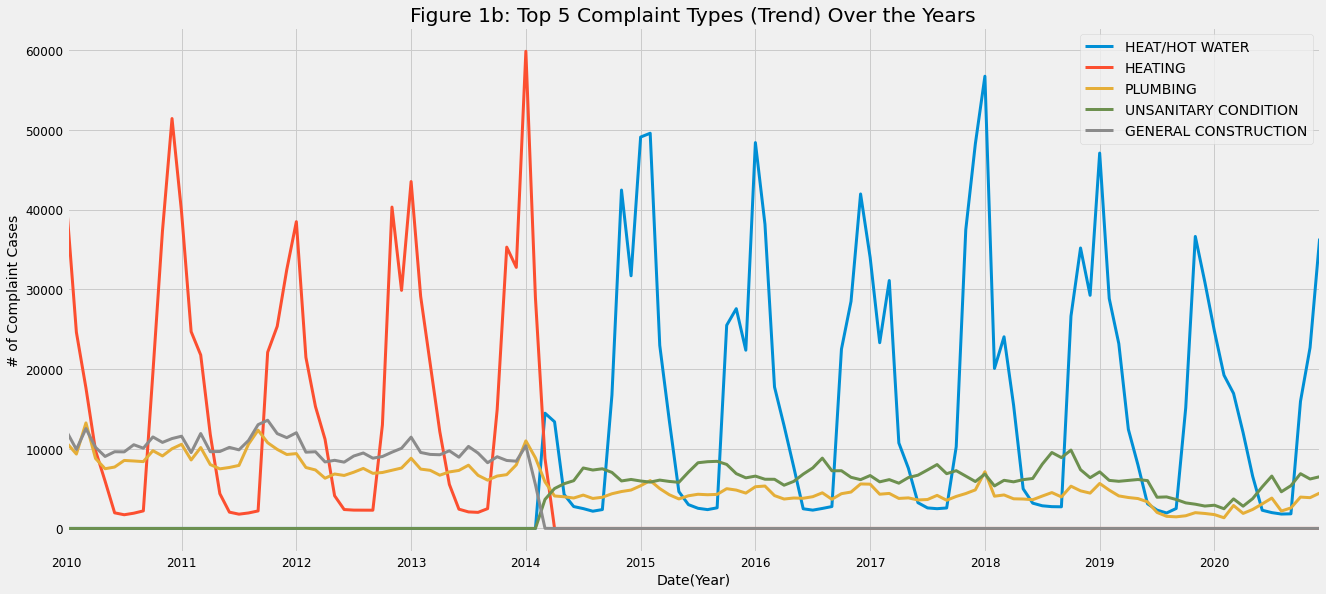

In [20]:
df_y.plot(linewidth =3)
plt.title('Figure 1b: Top 5 Complaint Types (Trend) Over the Years')
plt.ylabel('# of Complaint Cases')
plt.xlabel('Date(Year)')
plt.show()

<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

<li><span style='color:#3498DB'>HEAT/HOT WATER</span>: The Most Complaint Type since Year 2015. There are seasonality around the year. The # of cases spikes at the end of the years and continues to the beginning of the preceeding year and finally goes down in the middle of the year.<br><br>
<li><span style='color:#FF4500'>HEATING</span>: The previous most complaint type before HEAT/HOT WATER (from year 2010 to 2014). Having the similar pattern with HEAT/HOT WATER, it can assumed to be the precursor of HEAT/HOT WATER. <br><br>
<li><span style='color:#FF8C00'>PLUMBING</span>: Number of PLUMBING complaint cases remained constant in every month and eventually every year.<br><br>
<li><span style='color:#556B2F'>UNSANITARY CONDITION</span>: It first appeared in Year 2014. Since then, # of UNSANITARY CONDITION complaint cases remained constant monthly and annually. <br><br>
<li><span style='color:#808080'>GENERAL CONSTRUCTION</span>: Record of complaint cases of GENERAL CONSTRUCTION stopped in the Year 2014. Before that, # of GENERAL CONSTRUCTION remained constant monthly and annually. </li>

<h1 style='font-size: 2em; color: #2467C0'>Answer to Problem Statement 1:</h1>

Considering both the total amount of complaints made and the trend in recent years, Department of Housing Preservation and Development of New York City (HPD) should focus on **HEAT/HOT WATER**. <br> 
A quick research on Google can tell it is always a concern for HPD.<br>
To tackle this issue, HPD announced **"heat season"** begins on October 1st every year continues to May 31st the preceeding year. During this season, all residential building owners are required to maintain indoor temperatures at 68 degrees when outdoor temperatures fall below 55 degrees during the day. Indoor temperatures must also be a minimum of 62 degrees overnight, regardless of outdoor temperatures. Building owners are legally required to provide hot water at 120 degrees year-round. Also, financial assistance for owner-occupied properties are also available. <br> More information can be found <a href= 'https://www1.nyc.gov/site/hpd/news/042-20/hpd-start-the-2020-2021-heat-season-new-york-city#/0'> here</a>.

<img src='https://www1.nyc.gov/assets/hpd/images/content/pr/2019/heat-season.jpg' align='middle'>

<h1 style='font-size: 2em; color: #2467C0'>Problem Statement 2</h1>

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

This question can be answered by: <br>
1. comparing the total cases amount of each borough (2.1), ZIP codes (2.2), or street (2.3)
2. comparing the trend of each areas in previous year <br>
    (eg. the most affected area by total cases might not be the same as the most affected area recently)

In [21]:
import folium
import json
from folium import plugins

In [22]:
#Function: Filter dataset for different areas (eg. borough, zip, street)
def filter_df(df_, cond):
    df_ = df.copy()
    df_ = df_[[cond,'complaint_type']]
    df_ = df_.loc[df['complaint_type']=='HEAT/HOT WATER']
    df_ = df_[cond].value_counts()
    return df_

In [23]:
#dataset filter by zip
df_zip = filter_df(df, 'incident_zip')

#format dataset for folium map
df_zip = df_zip.to_frame()
df_zip.reset_index(inplace=True)
df_zip.rename(columns={'index':'zipcode','incident_zip':'NumCases'}, inplace=True)

In [24]:
#https://towardsdatascience.com/making-3-easy-maps-with-python-fb7dfb1036
#https://jsspina.carto.com/tables/nyc_zip_code_tabulation_areas_polygons/public/map for geojson file


mymap = folium.Map(location=[40.7128  ,-74.0060],  zoom_start=11, control_scale=True)

mymap.choropleth(geo_data='nyZips.geojson', data=df_zip, columns=['zipcode', 'NumCases'], \
                 key_on='feature.properties.postalcode', fill_color='RdGy_r', fill_opacity=0.5)

mymap

<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

It is obvious that most red-shaded region (more complaint cases) focused at certain points in BRONX while only one zipcode in BROOKLYN complaints a lot.

<h1 style='font-size:1.25em; color:#2467C0'>  2.1 Borough </h1>

In [25]:
#dataset filter by borough
df_borough = filter_df(df, 'borough')

In [26]:
#https://www.citypopulation.de/en/usa/newyorkcity/

Population = pd.DataFrame(index = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], data = [1418207, 2559903, 1628706, 2253858, 476143])
Population.rename(columns={0:'Population'}, inplace=True)

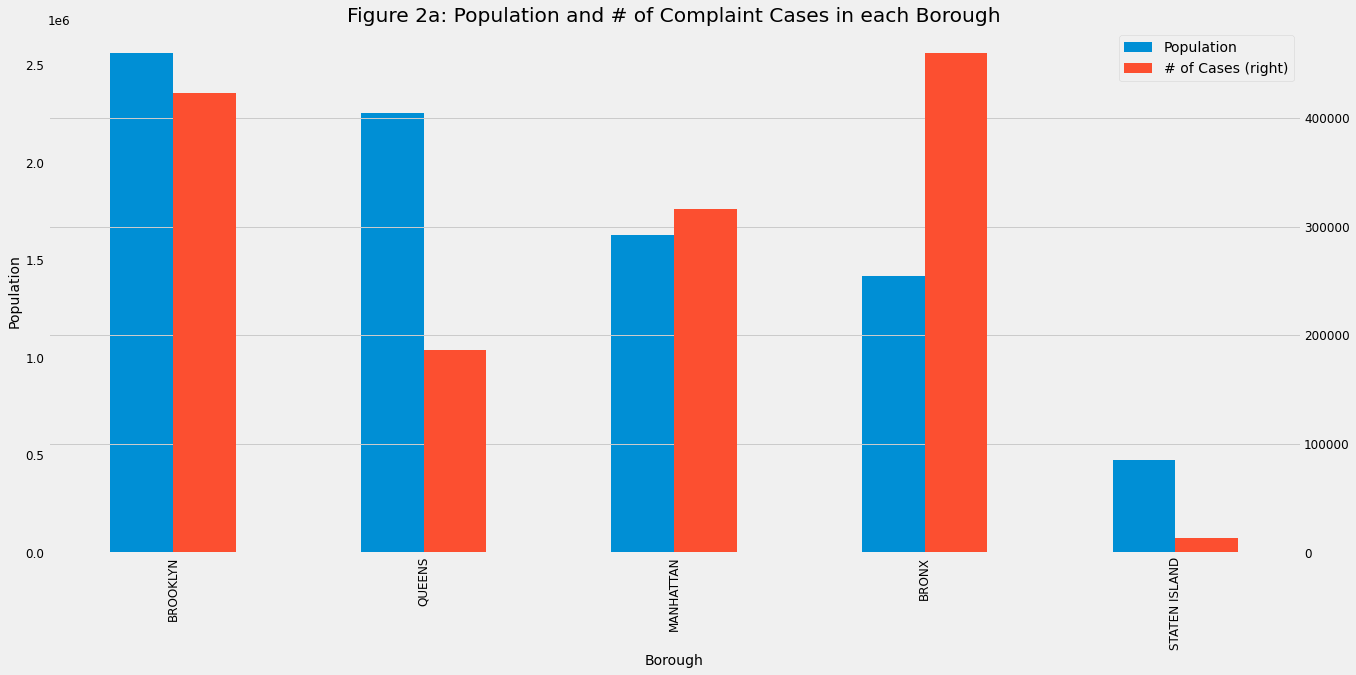

In [27]:
Pop_Complaints = Population.reset_index().merge(df_borough.reset_index())
Pop_Complaints = Pop_Complaints.sort_values('Population', ascending=False)
Pop_Complaints.rename(columns={'borough':'# of Cases'}, inplace=True)
ax=Pop_Complaints.plot(kind='bar', secondary_y='# of Cases')
ax.set_xticklabels(Pop_Complaints['index'])
ax.set_ylabel('Population')
ax.set_xlabel('Borough')
plt.title('Figure 2a: Population and # of Complaint Cases in each Borough')
plt.show()

<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

In the Year 2019, BRONX is the forth-populated borough (approximately 1.4 million population) but people living here lodged the most HEAT/HOT WATER complaints (roughly 500,000 cases). 

In [28]:
def timeseries_borough(df_, borough_name):
    df_ = df.copy()
    df_ = df_.loc[df_['complaint_type'] == 'HEAT/HOT WATER']
    df_ = df_[['created_date', 'borough']]
    df_ = df_.loc[df_['borough'] == borough_name]
    df_ = df_.sort_values('created_date')
    df_ = df_.set_index('created_date')
    df_.index = pd.to_datetime(df_.index)
    df_ = df_.resample('MS').count()
    df_ = df_.rename(columns={'borough': borough_name})
    df_ = df_.reset_index()
    return df_

In [29]:
#timeseries df for BRONX
df_BRONX = timeseries_borough(df, 'BRONX')
#timeseries df for BROOKLYN
df_BROOKLYN = timeseries_borough(df, 'BROOKLYN')
#timeseries df for MANHATTAN
df_MANHATTAN = timeseries_borough(df, 'MANHATTAN')
#timeseries df for QUEENS
df_QUEENS = timeseries_borough(df, 'QUEENS')
#timeseries df for STATEN ISLAND
df_STATEN_ISLAND = timeseries_borough(df, 'STATEN ISLAND')

In [30]:
#Merge dataset with timeseries dataset above


df_merge_borough = pd.merge(df_BRONX, df_BROOKLYN, how='outer')
df_merge_borough = pd.merge(df_merge_borough, df_MANHATTAN, how='outer')
df_merge_borough = pd.merge(df_merge_borough, df_QUEENS, how='outer')
df_merge_borough = pd.merge(df_merge_borough, df_STATEN_ISLAND, how='outer')


df_merge_borough = df_merge_borough.set_index('created_date')

In [31]:
#https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities
temp = pd.read_csv(r'C:\Users\User\Downloads/temperature.csv')
temp = temp[['myDt','AvgTemperature']]
temp.set_index(['myDt'], inplace=True)
temp.index = pd.to_datetime(temp.index)
temp = temp.resample('MS').mean()
temp['AvgTemperature'] = (temp['AvgTemperature']-32)*5/9
temp.index.min(), temp.index.max()

(Timestamp('2014-03-01 00:00:00', freq='MS'),
 Timestamp('2020-05-01 00:00:00', freq='MS'))

In [32]:
df_merge_borough.index.min(), df_merge_borough.index.max()

(Timestamp('2014-03-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))

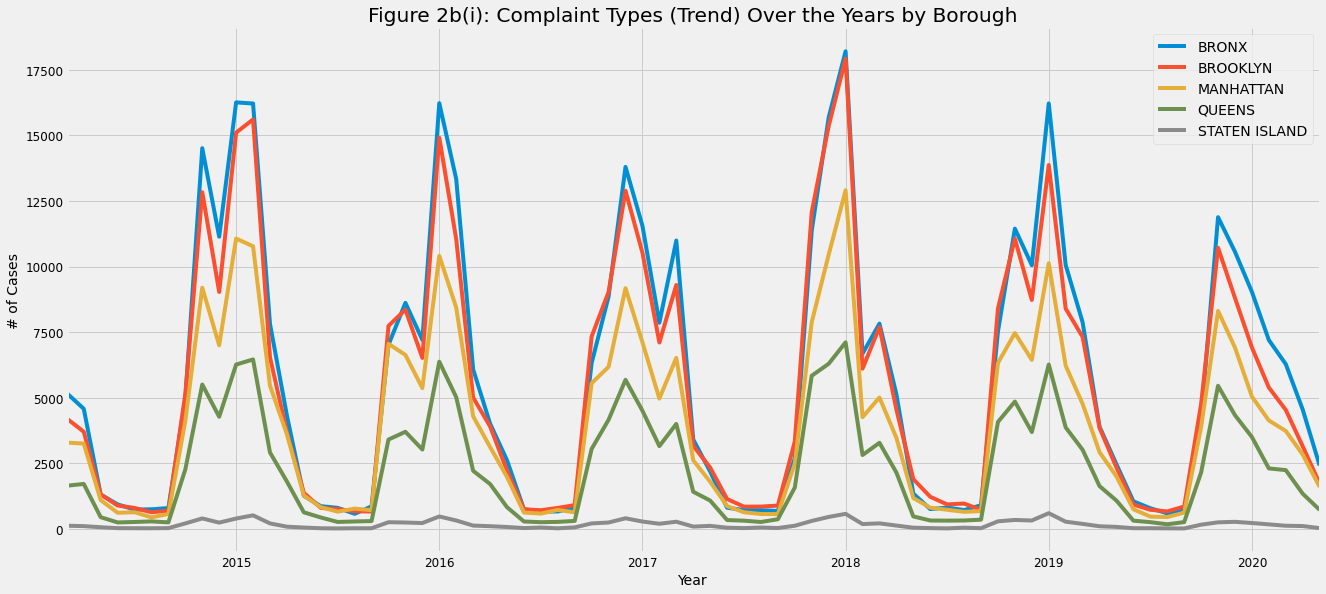

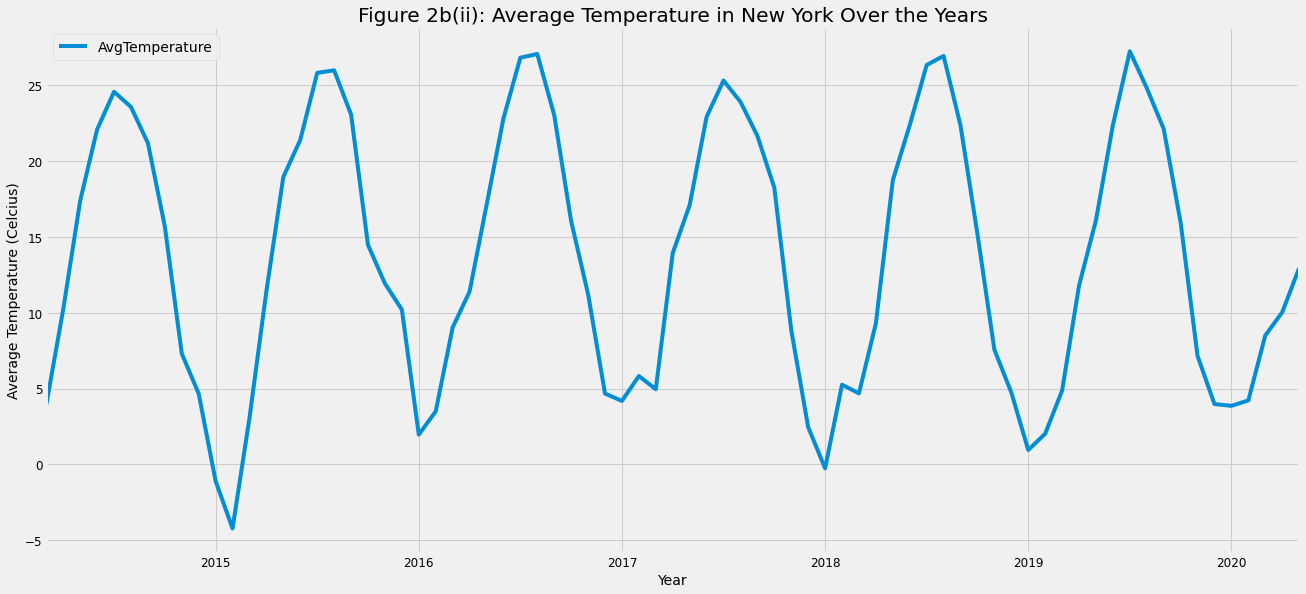

In [33]:
df_merge_borough.loc[:'2020-05-01 00:00:00'].plot()
plt.title('Figure 2b(i): Complaint Types (Trend) Over the Years by Borough')
plt.xlabel('Year')
plt.ylabel('# of Cases')

temp.plot()
plt.title('Figure 2b(ii): Average Temperature in New York Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Celcius)')

plt.show()

<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

Number of Complaint Cases from all boroughs have the same distinguishable pattern, increased sharply from the end of every year to the beginning of the preceeding and then decline gradually in the middle of the year (due to the cold temperature in Heat Season).<br>
The # of Cases is inversely proportional to the Average Temperature, the # of Cases increased every time the Average Temperature dropped below 20<span>&#8451;</span>.

<h1 style='font-size:1.25em; color:#2467C0'>  2.2 Zip </h1>

Continued from 2.1, BRONX should be the main focus at the time. Moving forward in 2.2 finding the zip codes to be focused on, the dataset will be filtered and only focus on: BRONX and Heat Season. <br>
*As Announced by HPD, Heat Season begins on 1st October each year and continues through May 31st on the preceeding year.*

In [34]:
def by_year(data_year, start, end, year):
    data_year = df.copy()
    data_year = data_year.sort_values('created_date')
    mask = (data_year['created_date'] <=  end) & (data_year['created_date'] >=  start) & (data_year['complaint_type']=='HEAT/HOT WATER') & (data_year['borough'] =='BRONX')
    data_year = data_year.loc[mask]
    data_year = data_year['incident_zip'].value_counts()
    data_year = data_year.to_frame()
    data_year = data_year.reset_index()
    data_year = data_year.rename(columns={'incident_zip': year, 'index': 'incident_zip'})
    data_year = data_year.sort_values('incident_zip')
    return data_year

heatseason2020 = by_year(df, '2020-10-01', '2021-05-31', '2020 - 2021 Heat Season')
heatseason2019 = by_year(df, '2019-10-01', '2020-05-31', '2019 - 2020 Heat Season')
heatseason2018 = by_year(df, '2018-10-01', '2019-05-31', '2018 - 2019 Heat Season')
heatseason2017 = by_year(df, '2017-10-01', '2018-05-31', '2017 - 2018 Heat Season')

In [35]:
df_merge_zip = pd.merge(heatseason2017, heatseason2018, how='outer')
df_merge_zip = pd.merge(df_merge_zip, heatseason2019, how='outer')
df_merge_zip = pd.merge(df_merge_zip, heatseason2020, how='outer')
df_merge_zip = df_merge_zip.set_index('incident_zip')

In [36]:
df_merge_zip.dropna().describe()

,2017 - 2018 Heat Season,2018 - 2019 Heat Season,2019 - 2020 Heat Season,2020 - 2021 Heat Season
count,25.000000,25.000000,25.000000,25.00000
mean,2757.000000,2707.520000,2242.240000,1029.60000
std,2111.594678,2042.627885,1771.725413,795.91839
min,45.000000,43.000000,19.000000,32.00000
25%,849.000000,1102.000000,1071.000000,334.00000
50%,2480.000000,2413.000000,2029.000000,883.00000
75%,4597.000000,4212.000000,3528.000000,1633.00000
max,6772.000000,6463.000000,6403.000000,2349.00000


There are 25 zip codes in BRONX. <br>
The mean in 2019-2020 Heat Season seems to decline. 

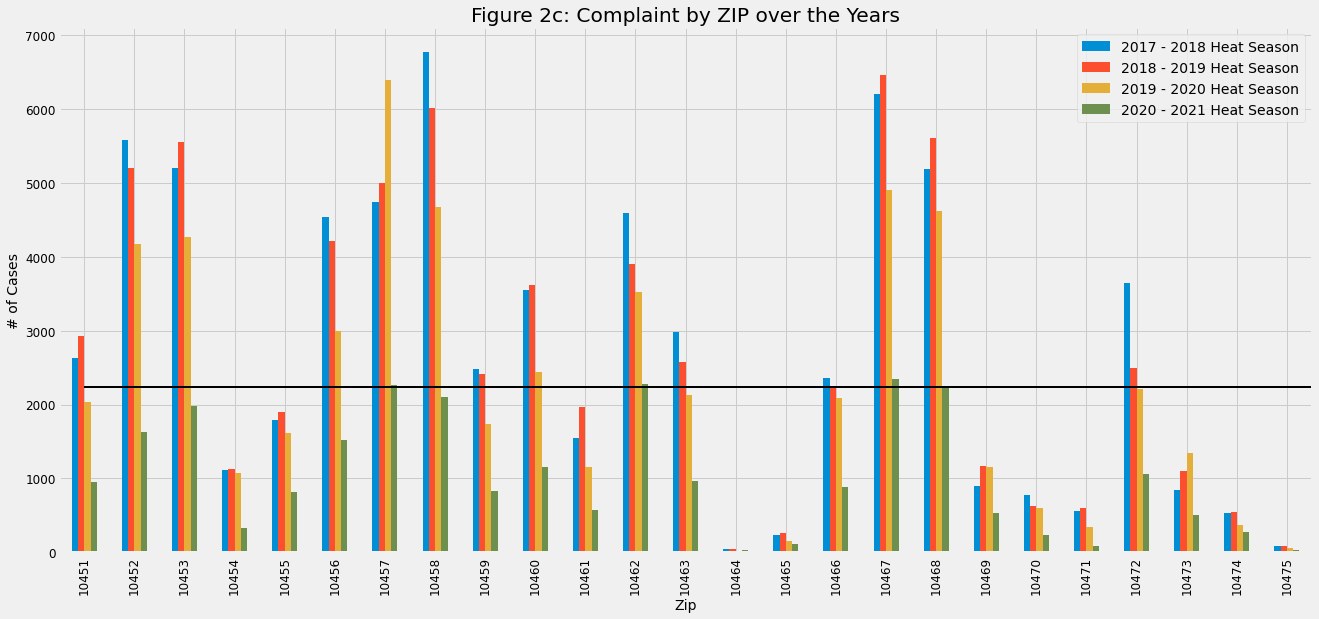

In [37]:
df_merge_zip.dropna().plot.bar()
plt.plot([2242, 0],[2242, 2242], 'k-', lw=2, label='mean')
plt.title('Figure 2c: Complaint by ZIP over the Years')
plt.xlabel('Zip')
plt.ylabel('# of Cases')
plt.show()

In [38]:
print('The Top 5 Incident Zip Codes in BRONX during 2019 -2020 Heat Season:')
for x in heatseason2019.sort_values('2019 - 2020 Heat Season', ascending=False)['incident_zip'][:5]:
    print(x)

The Top 5 Incident Zip Codes in BRONX during 2019 -2020 Heat Season:
10457
10467
10458
10468
10453


In [39]:
x = 100*heatseason2019.sort_values('2019 - 2020 Heat Season', ascending=False)[:5]['2019 - 2020 Heat Season'].sum()/heatseason2019.sort_values('2019 - 2020 Heat Season', ascending=False)['2019 - 2020 Heat Season'].sum()
print('The above mentioned Top 5 zip codes contributed over {:.2f}% of Total Complaint Cases in BRONX'.format(x))

The above mentioned Top 5 zip codes contributed over 44.35% of Total Complaint Cases in BRONX


In [40]:
print('The zip codes that have already exceeds the mean, {:.2f} of 2019-2020 Heat Season:'.format(df_merge_zip['2019 - 2020 Heat Season'].describe().mean()))
heatseason2020[heatseason2020['2020 - 2021 Heat Season'] >= df_merge_zip['2019 - 2020 Heat Season'].describe().mean()]

The zip codes that have already exceeds the mean, 2048.31 of 2019-2020 Heat Season:


,incident_zip,2020 - 2021 Heat Season
2,10457,2259
4,10458,2108
1,10462,2278
0,10467,2349
3,10468,2238


<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

<li> Trend: All the zip codes lodged lesser complaints over the years except <b>10457</b>.
<li> Top 5 Zips in 2019-2020 Heat Season: <b> 10457, 10467, 10458, 10468, 10453</b>, contributed over <b>44%</b> of Total Complaint Cases in BRONX. 
<li> Top 5 Zips that currently have exceed the mean in 2019-2020 Heat Season: <b> 10457, 10458, 10462, 10467, 10468 </b>.
<li> The mean of # of Cases remain constant at approximately 2,700 cases per Heat Season in 2017-2018 & 2018-2019 Heat Season and then declined to 2242 in 2019-2020 Heat Season.

<h1 style='font-size:1.25em; color:#2467C0'>  2.3 Street </h1>

In [41]:
#zip filtered dataset
def by_year(data_year, start, end, year):
    data_year = df.copy()
    data_year = data_year.loc[data_year['complaint_type'] == 'HEAT/HOT WATER']
    data_year = data_year.dropna(subset=['incident_zip'], axis=0)
    data_year = data_year.sort_values('created_date')
    mask_1 = (data_year['created_date'] <=  end) & (data_year['created_date'] >=  start) & (data_year['complaint_type']=='HEAT/HOT WATER') & (data_year['borough'] =='BRONX')
    data_year = data_year.loc[mask_1]
    #data_year['incident_zip'] = data_year['incident_zip'].astype('int')
    mask_2 = (data_year['incident_zip'] == 10457) | (data_year['incident_zip'] == 10458) |  (data_year['incident_zip'] == 10462) | (data_year['incident_zip'] == 10467)\
    & (data_year['incident_zip'] == 10468)
    #data_year = data_year.loc[mask_2]
    data_year = data_year['street_name'].value_counts()
    data_year = data_year.to_frame()
    data_year = data_year.reset_index()
    data_year = data_year.rename(columns={'street_name': year, 'index': 'street_name'})
    return data_year

heatseason2020_street = by_year(df, '2020-10-01', '2021-05-31', '2020 - 2021 Heat Season')
heatseason2019_street = by_year(df, '2019-10-01', '2020-05-31', '2019 - 2020 Heat Season')
heatseason2018_street = by_year(df, '2018-10-01', '2019-05-31', '2018 - 2019 Heat Season')
heatseason2017_street = by_year(df, '2017-10-01', '2018-05-31', '2017 - 2018 Heat Season')

In [42]:
df_merge_street = pd.merge(heatseason2017_street, heatseason2018_street, how='outer')
df_merge_street = pd.merge(df_merge_street, heatseason2019_street, how='outer')
df_merge_street = pd.merge(df_merge_street, heatseason2020_street, how='outer')
df_merge_street['sum'] = df_merge_street.sum(axis=1)
df_merge_street = df_merge_street.sort_values('sum', ascending=False)

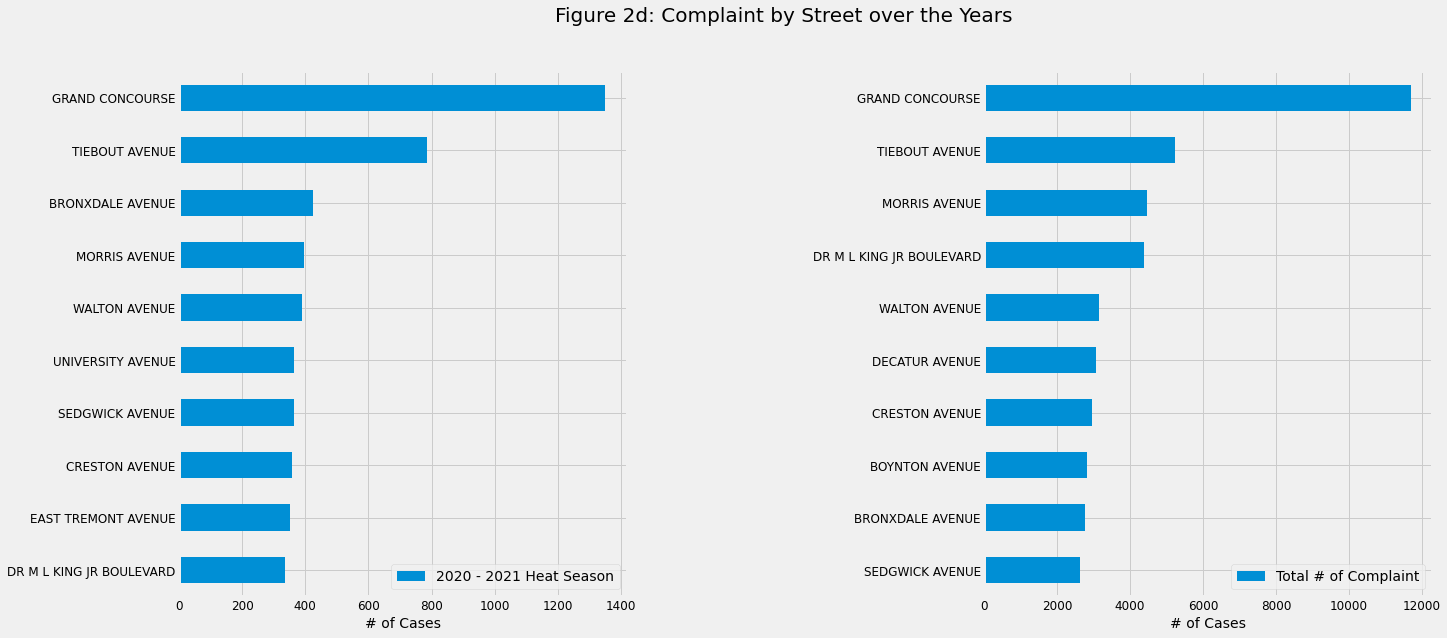

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1 = heatseason2020_street[:10].plot(kind='barh', ax=ax1)
ax1.set_yticklabels(heatseason2020_street['street_name'][:10])
ax1.invert_yaxis()
ax1.set_xlabel('# of Cases')
ax2 = df_merge_street['sum'][:10].plot(kind='barh', ax=ax2, label='Total # of Complaint')
ax2.set_yticklabels(df_merge_street['street_name'][:10])
ax2.invert_yaxis()
ax2.legend()
fig.subplots_adjust(wspace=0.8)
plt.suptitle('Figure 2d: Complaint by Street over the Years', fontsize=20)
plt.xlabel('# of Cases')
plt.show()

In [44]:
df_merge_street.describe()

,2017 - 2018 Heat Season,2018 - 2019 Heat Season,2019 - 2020 Heat Season,2020 - 2021 Heat Season,sum
count,813.000000,816.000000,776.000000,714.000000,1066.000000
mean,84.793358,85.202206,72.275773,36.050420,206.649156
std,204.547040,206.644372,191.925721,80.287039,566.513559
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,5.000000,4.000000,10.000000
50%,24.000000,26.000000,24.000000,14.000000,44.000000
75%,85.000000,88.000000,73.000000,37.000000,189.000000
max,3444.000000,4019.000000,3270.000000,1350.000000,11697.000000


<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

<li> GRAND CONCOURSE & TIEBOUT AVENUE had always been the top contributors to HEAT/HOT WATER complaints.
<li> BRONXDALE AVENUE should be investigated for the reason being Top 3 in 2020-2021 Heat Season while only Top 9 in Total # of Cases.
<li> Focusing on 2020-2021 Heat Season, the main concern should be the above shown street.

<h1 style='font-size: 2em; color: #2467C0'>The Answer to Question 2:</h1>

HEAT/HOT WATER is always an issue since 2014 in all borough. **BRONX**, the *forth* populated borough lodged the *most* complaints. Thus, should the main foucs at the time be **BRONX**, escpecially on zip codes **10457, 10458, 10462, 10467, 10468**. While focusing on the aforementioned zip codes, pay more attention to the street named: **TIEBOUT AVENUE, GRAND CONCOURSE** and **BRONXDALE AVENUE**.

<img src='http://www.bronxmall.com/com/reference/zipcode.jpg'/>

<h1 style='font-size:2em; color:#2467C0'> Problem Statment 3 </h1>

Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?<br>
<br>
This question can be answered by: <br>
1. visualing the matrices of correlation between Number of Cases and different building characteristics.
2. visualing the impact of the most impactful building characteristic on the number of cases.

*To answer the above questions, additional data set to be imported.*

### About dataset

This PLUTO dataset will have the housing characteristic in BRONX. It can be downloaded from <a href = ' https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip'> here </a>.

| Field          | Description                                                    |
|----------------|--------------------------------------------------------------  |
| Address        |The building's address.                                            |
| BldgDepth      |The building’s depth, which is the effective perpendicular distance, measured in feet. |
| BuiltFAR       |The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.|
| LotArea        |Total area of the tax lot, expressed in square feet rounded to the nearest integer.|
| LotDepth       |The tax lot's depth measured in feet.|
| NumFloors      |The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.|
| ResArea        |An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use. |
| YearBuilt      |The year construction of the building was completed.|
| YearAlter1     |If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began. |
| ZipCode        |The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system.|
| YCoord         |The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system. |
| XCoord         |The X coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system. |

In [45]:
df_bx = pd.read_csv(r'C:\Users\User\Downloads/BX_18v1.csv')
df= pd.read_csv(r'C:\Users\User\Downloads/fhrw-4uyv.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
df = df.loc[df['complaint_type'] == 'HEAT/HOT WATER']
df = df.loc[df['borough']=='BRONX']

In [47]:
df_a = df['incident_address'].value_counts().to_frame().rename(columns={'incident_address':'case_count'})

In [48]:
df_bx = df_bx[['Address', 'BldgDepth', 'BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_b = df_bx.copy(deep=True)

In [49]:
df_c = pd.merge(left=df_a, right=df_b, left_on = df_a.index, right_on='Address', how='left')

In [50]:
print('The total of complaint cases investigated is {}.'.format(df_c['case_count'].sum()))

The total of complaint cases investigated is 459851.


In [51]:
df_d = df_c.copy(deep=True)

In [52]:
df_d[['BldgDepth','BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]=df_d[['BldgDepth','BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']].replace(np.nan, 0).astype('str')
df_d.describe(include='all')

,case_count,Address,BldgDepth,BuiltFAR,LotArea,LotDepth,NumFloors,ResArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
count,19272.000000,19272,19272,19272,19272,19272,19272,19272,19272,19272,19272,19272,19272
unique,NaN,19245,1060,709,5225,2586,39,6246,127,88,26,12501,11789
top,NaN,388 WILLIS AVENUE,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,3,3608,3499,3417,5648,5180,4045,3520,16425,3406,3436,3436
mean,23.861094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,98.893566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
matplotlib.rcParams['figure.figsize'] = [40,40]

In [54]:
def plot_(x, BC, ax1):
    x = df_c[['case_count', BC]].groupby(BC).sum().sort_values('case_count', ascending=False)
    case_sum = x['case_count'].sum()
    x['weighted'] = x['case_count']*100/case_sum
    x.index= x.index.map(str)
    x = x[:500]
    x.index= x.index.map(float)
    x.sort_values(BC)['weighted'].plot(kind='bar', ax=ax1)

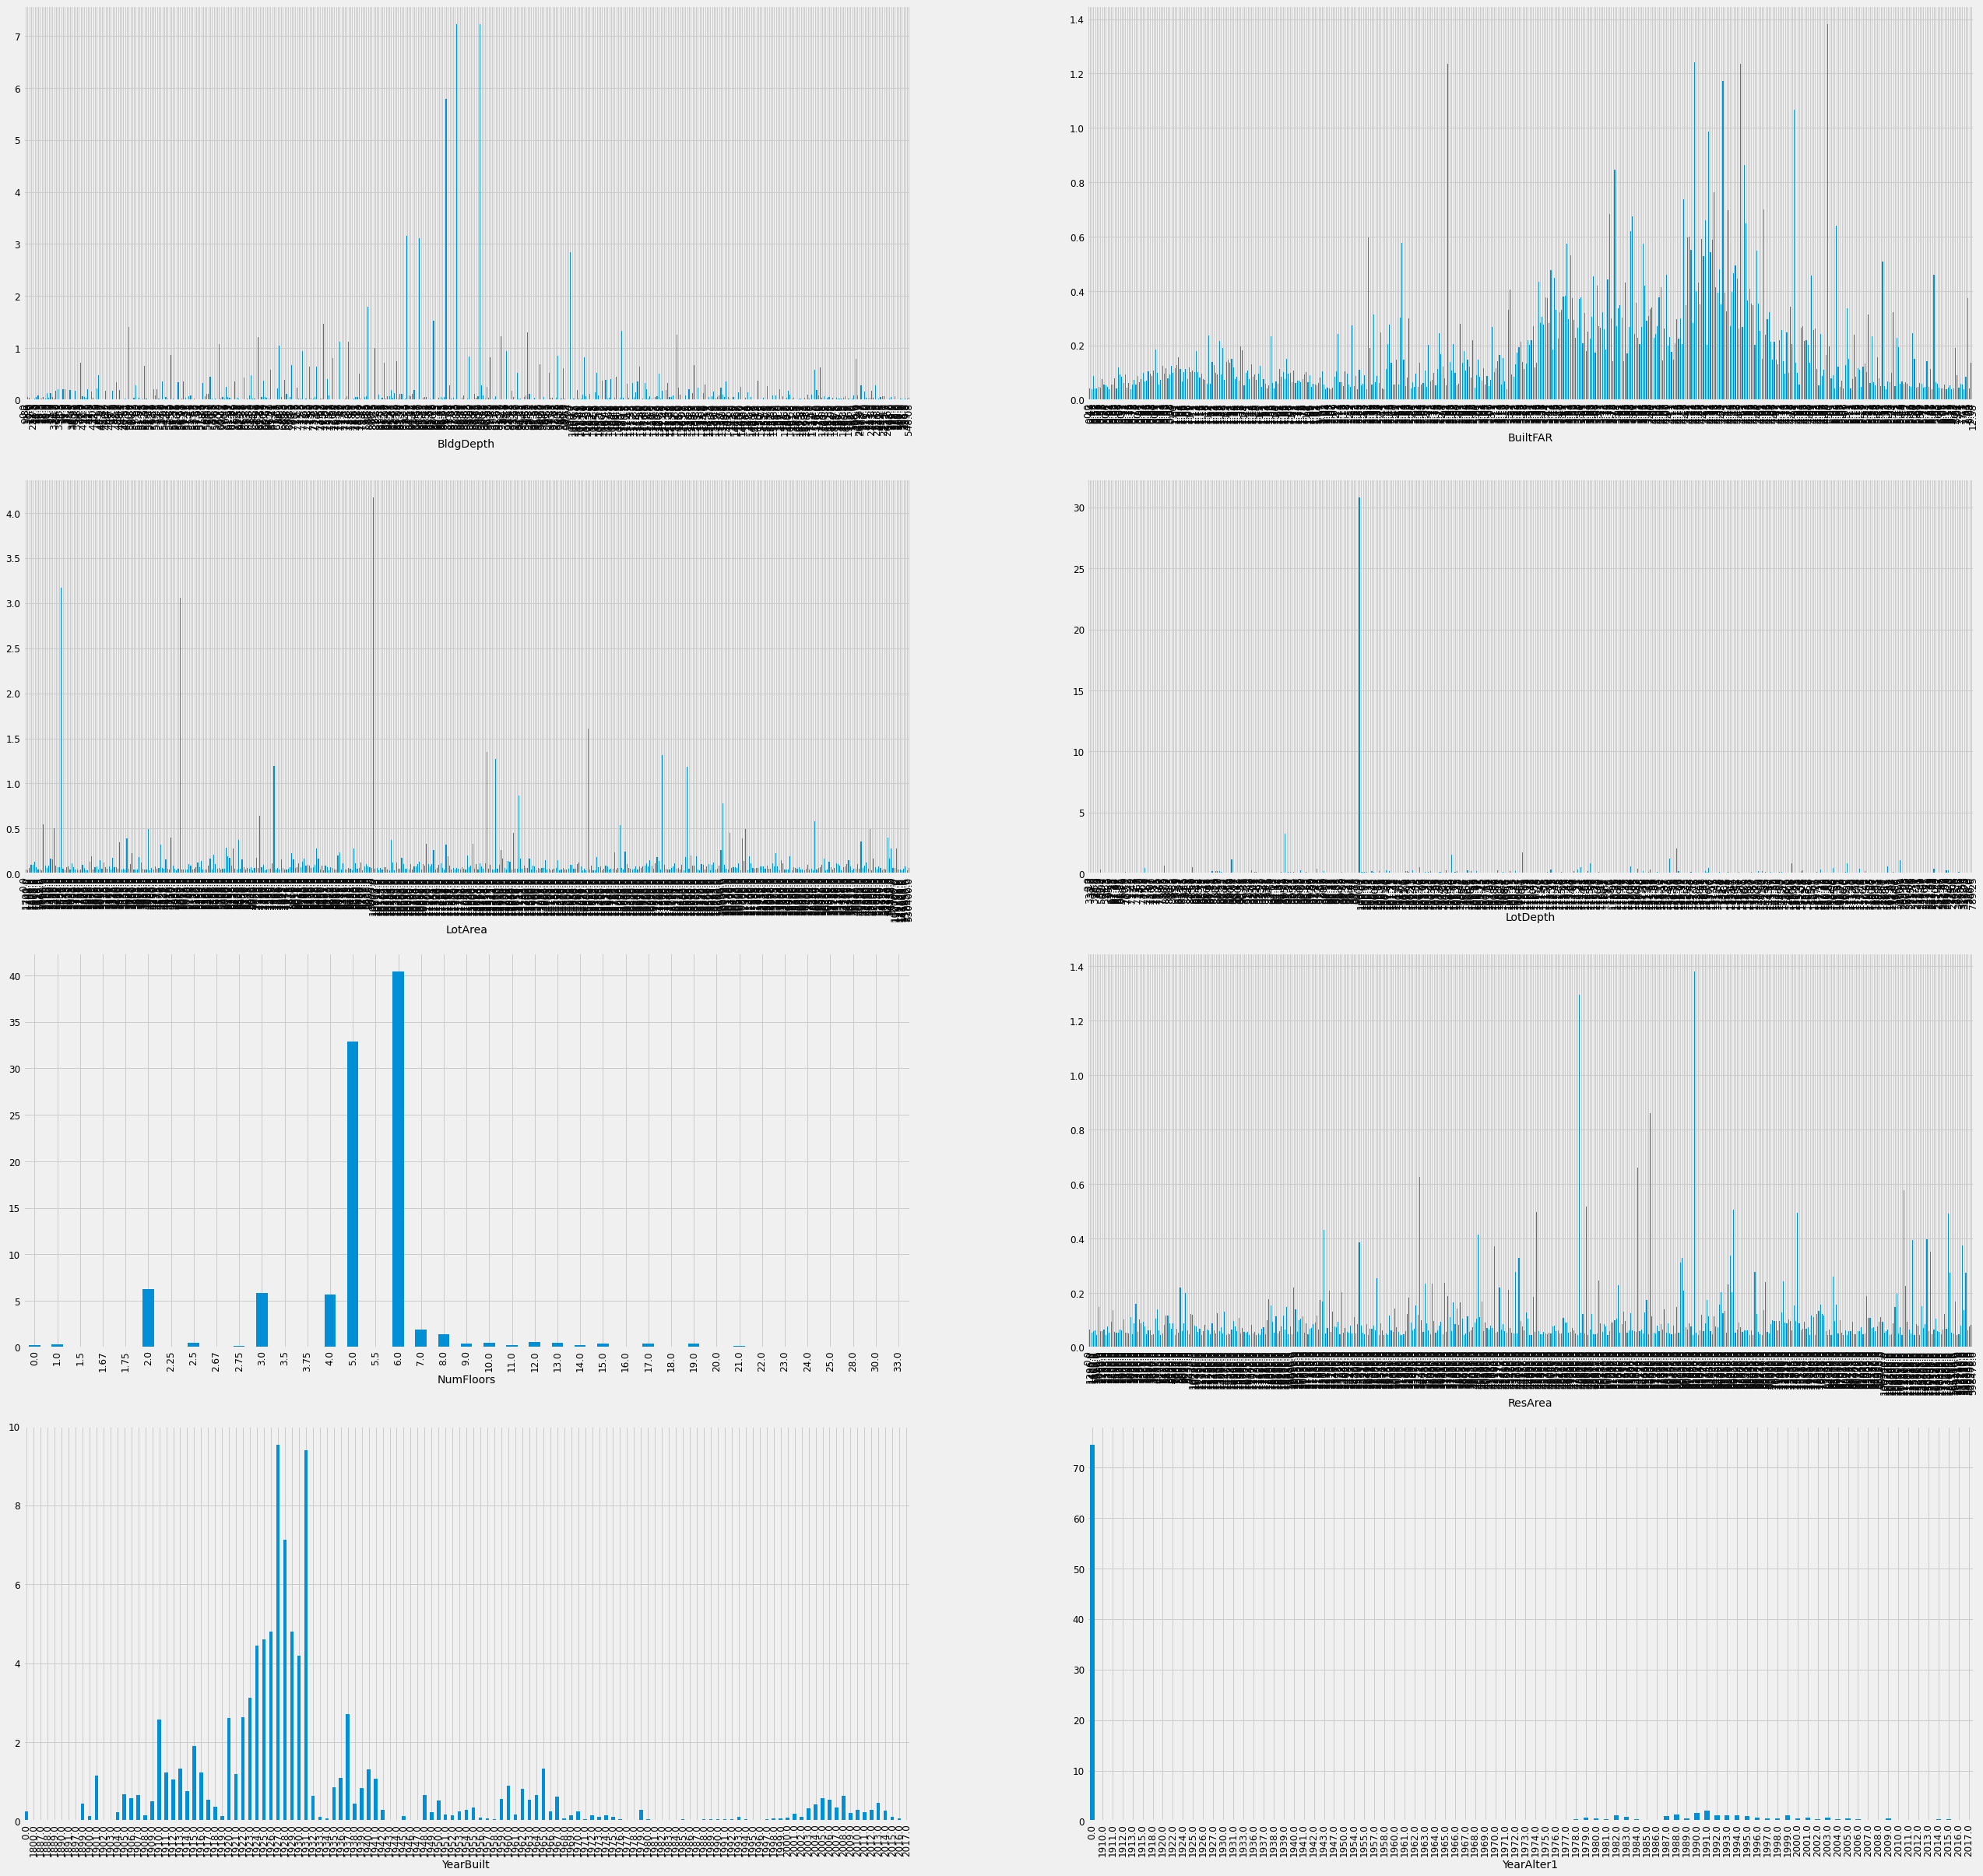

In [55]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(4,2)

plot_(x, 'BldgDepth', ax1)
plot_(x, 'BuiltFAR', ax2)
plot_(x, 'LotArea', ax3)
plot_(x, 'LotDepth', ax4)
plot_(x, 'NumFloors', ax5)
plot_(x, 'ResArea', ax6)
plot_(x, 'YearBuilt', ax7)
plot_(x, 'YearAlter1', ax8)


In [56]:
matplotlib.rcParams['figure.figsize'] = [20,9]

<h1 style='font-size: 2em; color: #2467C0'>The Answer to Question 3:</h1>

<h1 style='font-size: 1.2em; color: #9900cc'> Analysis of Finding </h1>

A detailed analysis can be found <a href='https://github.com/GieselC/NewYorkComplaintCases/blob/main/Q3.ipynb'> here </a>. 
The building characteristic that is relatively strongly related the case count is <span style='color:#9900FF'> NumFloors </span> . Most of the complaints (<span style='color:#9900FF'>75%</span> of total cases) came from Building with <span style='color:#9900FF'>NumFloors of 5.0 and 6.0</span>. <br>
Analysis of The building characteristic <span style='color:#9900FF'>YearAlter1</span> also stated that most complaints (<span style='color:#9900FF'>70%</span> of total cases) came from buildings that <span style='color:#9900FF'>have not been altered before</span>. <br>
Analysis of The building characteristic <span style='color:#9900FF'>YearBuilt</span> stated that most complaints (<span style='color:#9900FF'>54%</span> of total cases) came from those with YearBuilt ranges <span style='color:#9900FF'>between 1924 and 1931</span>. <br>
There are some outliers in most attributes(building characteristics) including <span style='color:#9900FF'>BldgDepth, LotDepth</span> and <span style='color:#9900FF'>LotArea</span>. <br>
In the others (<span style='color:#9900FF'>BuiltFAR, ResArea</span>), the complaints are considerably evenly distributed among the unique values. <br>


<h1 style='font-size:2em; color:#2467C0'> Problem Statment 4 </h1>

Can a predictive model be built for a future prediction of the  number of complaints of the type that you have identified in response to question 1?<br>
<br>
*From the visualisation in previous questions, all borough has the same trends. The data used to forecast here in Question 4 is the total number of HEAT/HOT WATER complaint cases over the years.*

Two types of forecasting methods are used: <br>
1. ARIMA 
2. fbProphet

Steps in both forecasting are similar:
1. Fitting the model
2. Validating the forecast
3. Producing and visualizing forecasts

More information can be found at <a href='https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b'> here </a>.

In [57]:
df_hhw = df_hhw.set_index('created_date')

In [58]:
df_hhw = df_hhw.resample('MS').sum()

In [59]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [60]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_hhw,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1857.6888500489213
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1533.8449177186558
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1435.57404259254
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1178.1907422451477
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1449.2005208599942
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1424.680579012621
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1206.0761808327682
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1180.1798392354701
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1784.2944370591135
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1499.8995321927935
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1417.7924665350135
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1160.2664534554353
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1450.2860806776703
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1491.401909284631
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1208.275605773661
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1162.1393625303726
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1725.7613332328965
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1444.55602266638

The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value, an optimal option.

**Fitting the ARIMA model**

In [61]:
mod = sm.tsa.statespace.SARIMAX(df_hhw,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

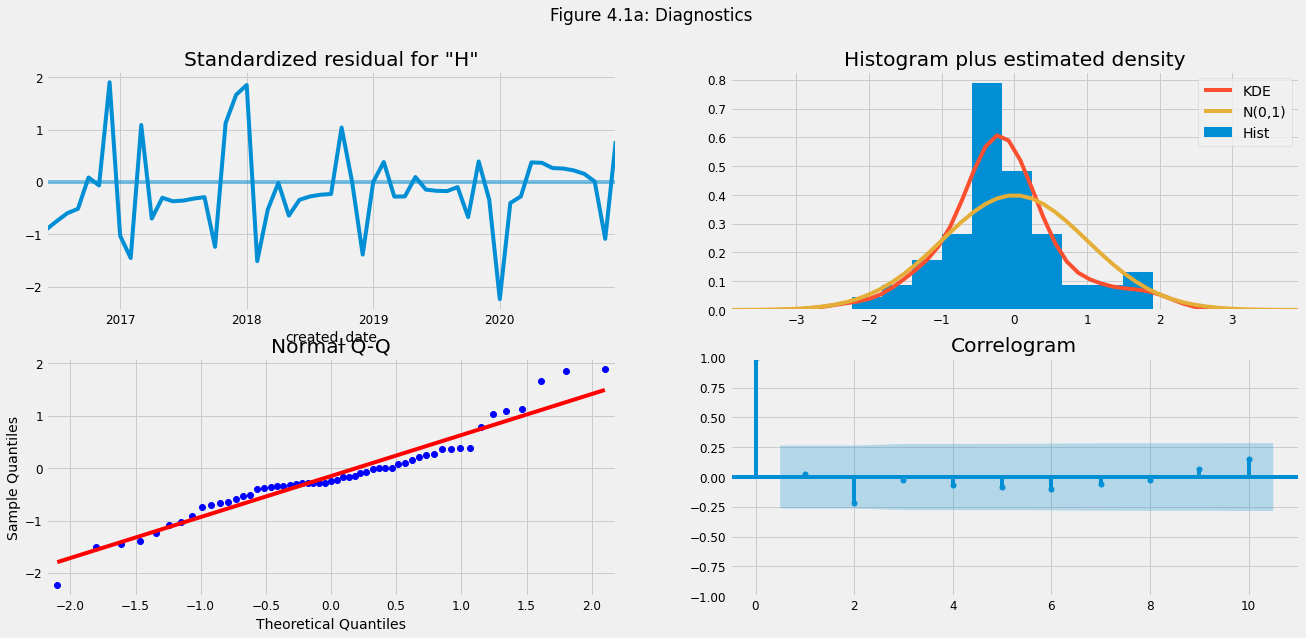

In [62]:
results.plot_diagnostics()
plt.suptitle('Figure 4.1a: Diagnostics')
plt.show()

It is not perfect, however, this model diagnostics suggests that the model residuals are near normally distributed.

**Validating forecasts**<br>
To understand the accuracy of the forecasts, predicted number of complaint cases is compared to the cases of the original data set, and the forecasts is set to start at 2017–01–01 to the end of the data.

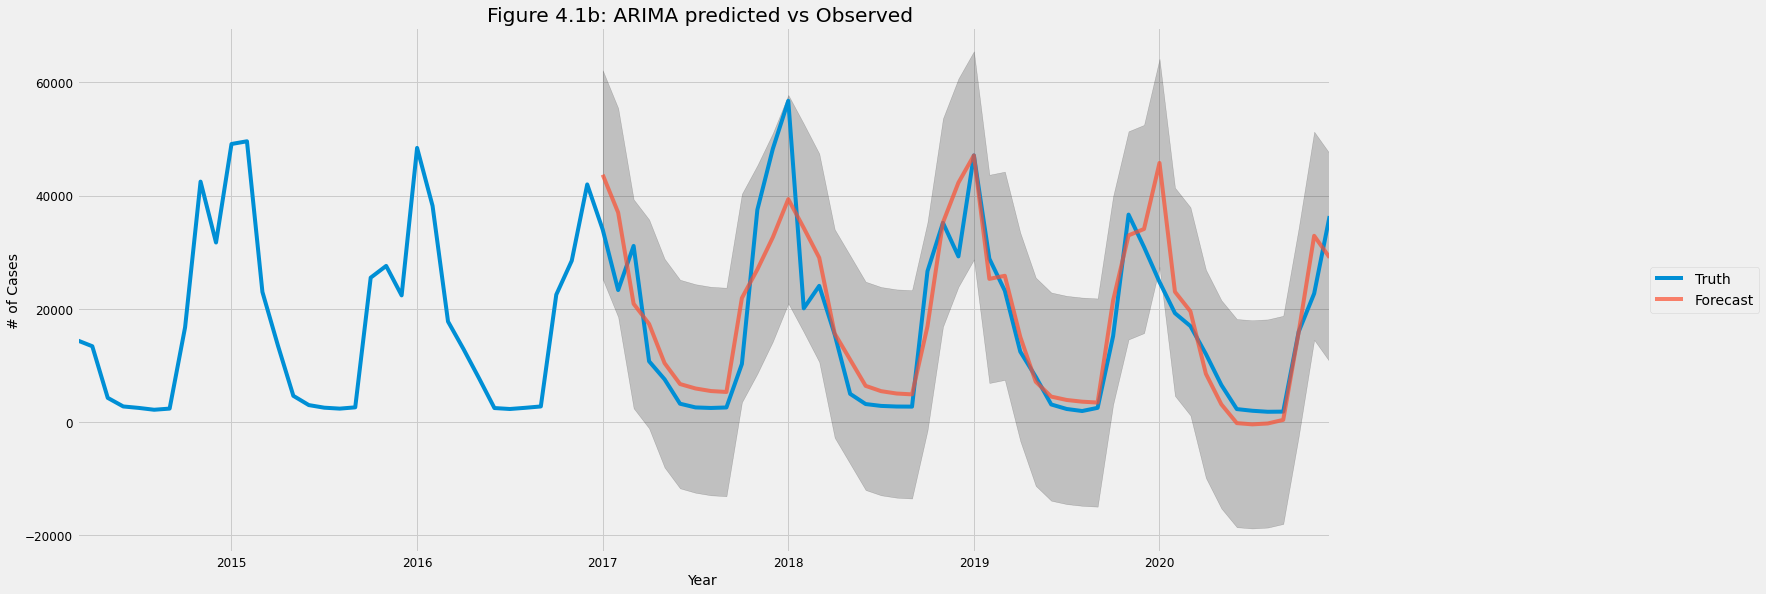

In [63]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_hhw.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend(labels = ('Truth', 'Forecast'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 4.1b: ARIMA predicted vs Observed ')
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, the forecasts are align with the true values very well, showing an upward trend starts from the end of the year and captured the seasonality toward the heat season (from October to May).

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
y_forecasted = pred.predicted_mean
y_truth = df_hhw['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth)))

RMSE = 7338.5


In statistics, Root Mean Square Error (RMSE) indicates that this model was able to forecast the monthly complaint cases in the test set within 7388 of the real number of cases. Knowing that the monthly complaint cases range from around 400 to over 40,000. In my opinion, this is a pretty good model so far.

**Producing and visualizing forecasts**

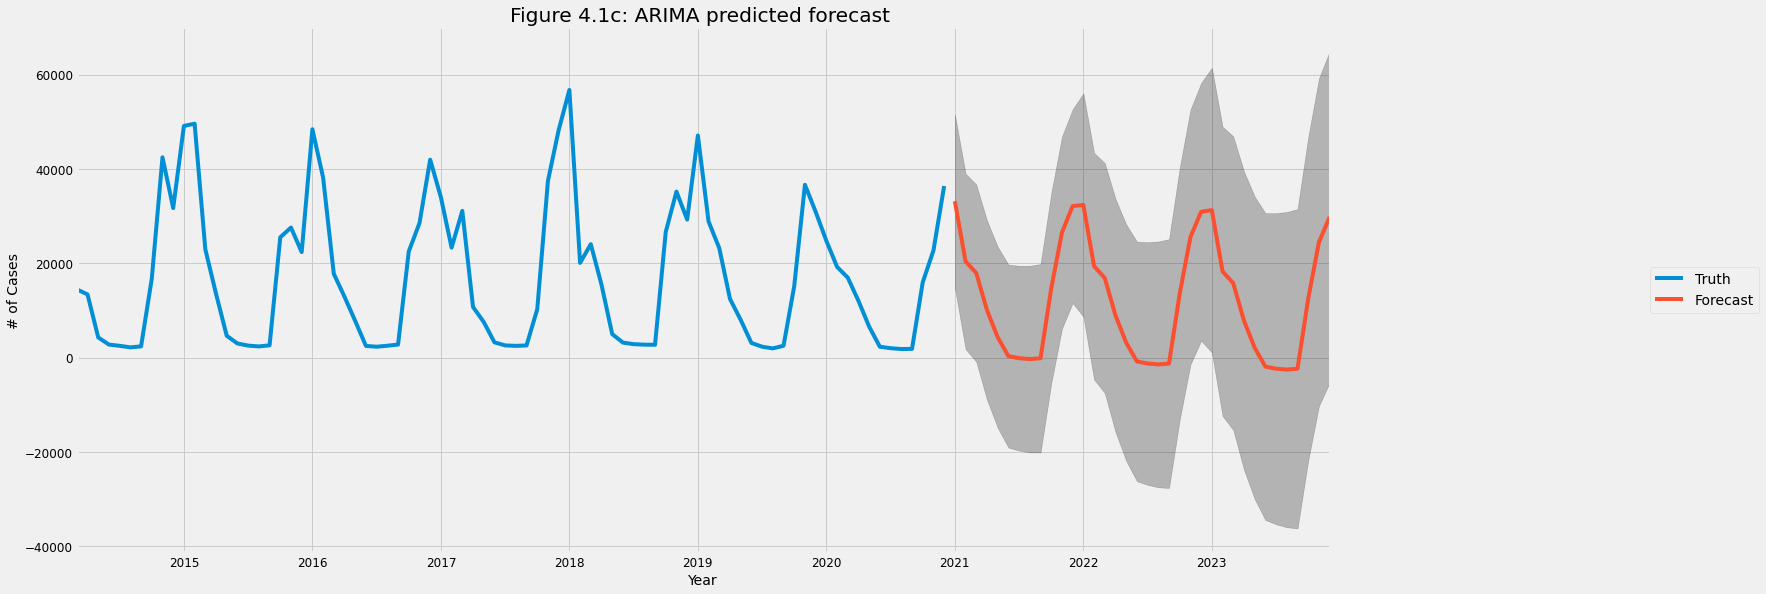

In [66]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax =  df_hhw.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend(labels = ('Truth', 'Forecast'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 4.1c: ARIMA predicted forecast ')
plt.show()

This model clearly captured monthly complaint cases seasonality. However, as the forecast further out into the future, it is natural that the values to become less accurate (eg. the lowest total is decreasing below 0).

## 4.2 Forecast with fbProphet
Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. 

In [67]:
from fbprophet import Prophet

In [68]:
z = df_hhw
z = z.reset_index()
z.rename(columns={'created_date':'ds', 'HEAT/HOT WATER':'y'}, inplace=True)

**Fitting the Prophet model**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(1.9750000000000014, 0.5, '# of Cases')

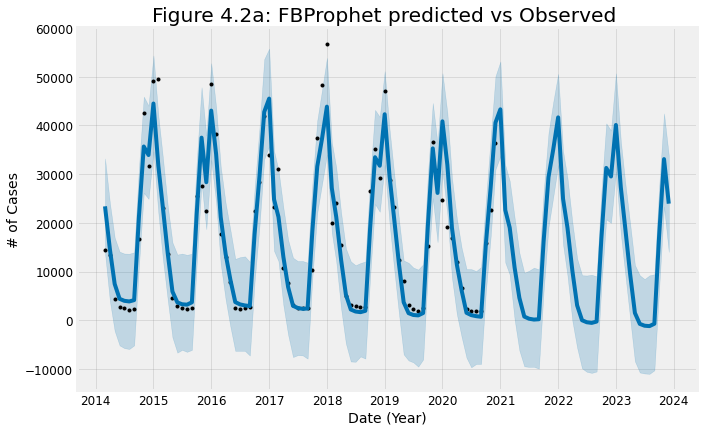

In [69]:
m = Prophet(interval_width=0.95)
m.fit(z)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)
m.plot(forecast)


plt.title('Figure 4.2a: FBProphet predicted vs Observed ')
plt.xlabel('Date (Year)')
plt.ylabel('# of Cases')

In [70]:
y_forecasted = forecast['yhat'][0:48]
y_truth = df_hhw['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth[:48])))

RMSE = 15741.6


**Producing and visualizing forecasts**

Text(0.5, 1.0, 'Figure 4.2c: Complaint Cases Estimate')

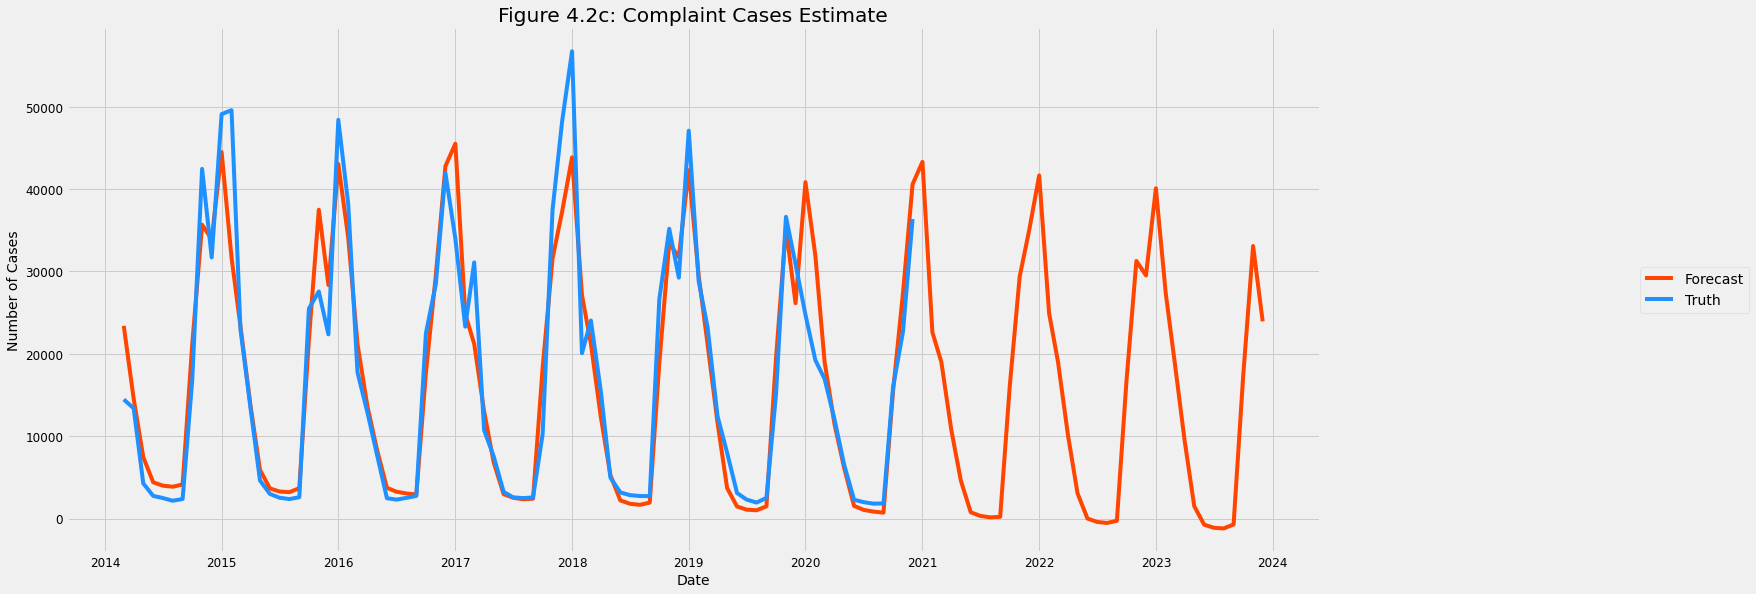

In [71]:
plt.plot(forecast['ds'], forecast['yhat'], 'orangered')
plt.plot(z['ds'], z['y'], 'dodgerblue')

plt.plot()
plt.legend(labels = ('Forecast', 'Truth'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.xlabel('Date') 
plt.ylabel('Number of Cases')
plt.title('Figure 4.2c: Complaint Cases Estimate')

**Trends and Patterns**

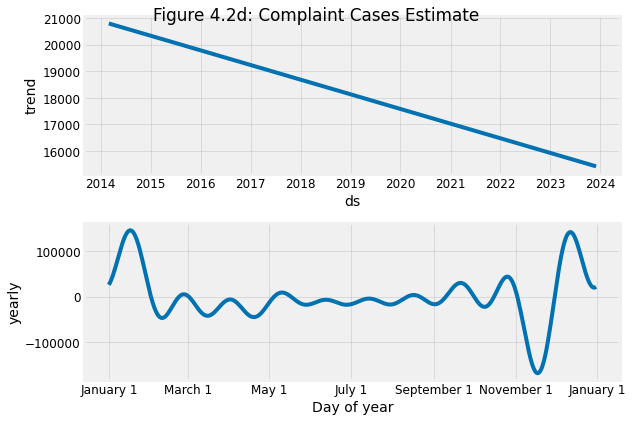

In [72]:
m.plot_components(forecast)
plt.suptitle('Figure 4.2d: Complaint Cases Estimate')
plt.show()

<h1 style='font-size: 2em; color: #2467C0'>The Answer to Question 4:</h1>

Though having different RMSE, approximately 7000 (ARIMA) and 15000 (fbPRophet), both forecasts from both method show a declining trend.

<h1 style='font-size:2.5em; color:#330066'> Conclusion </h1>

By answering all the questions in Problem Statement, the main concern of HPD is identified to be the HEAT/ HOT WATER problem, most of the complaint cases are contributed by people living in Bronx and Brooklyn Boroughs. Considering the population of Bronx (1.6million), it lodged the number of complaint cases (70,000 cases), eventually the same as Brooklyn, the borough with a population of 2.5million. Thus, HPD should focus more on the Bronx, especially the following Zip Codes, 10457, 10458, 10462, 10467, 10468. Focusing on the zip codes, Tiebout Avenue, Grand Concourse and Bronxdale Avenue are the Top 3 most complaint streets. When diving into the correlation relationship between housing characteristics and the number of cases, the correlation value ranges between -0.2 to 0.2 which indicates that the relationship between them is relatively weak. However, it was proved that people living in accommodation with the number of floors of 5 and 6 complaint the most. Lastly, when forecasting the future number of cases, both ARIMA and fbProphet showed a declining trend. This could be a heartwarming outcome of the effort of HPD because they have already started to access complainants’ apartments since the heat season 2018. Even in the height of the local COVID-19 outbreak, the inspectors are still on their duty and have conducted over 100,000 heat and hot water inspections. However, increasing effort should be given as there are still people suffering in the cold during heat season, especially in the COVID-19 pandemic. Thanks for reading and stay safe.